# `6_summary.ipynb`

In this notebook results from all previous notebooks are shown and compared.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from common import read_results

In [3]:
results = pd.read_csv("results.csv")

## `results.csv`

There are all the times we got in the different benchmarks sorted from slowest to fastest.

In [4]:
results

,timestamp,hostname,test,timeit_avg,timeit_std
0,2023-09-10 13:18:00.397559,nid06398,list_pointwise,8.230000,4.210000e-03
1,2023-09-10 13:24:04.101762,nid06398,list_sin_pointwise,14.300000,1.410000e-02
2,2023-09-10 13:25:11.474286,nid06398,array_pointwise,15.100000,4.000000e-03
3,2023-09-10 13:30:54.202217,nid06398,array_sin_pointwise,22.300000,2.360000e-02
4,2023-09-10 13:30:57.573324,nid06398,numpy_pointwise,0.000036,1.040000e-07
5,2023-09-10 13:31:04.791840,nid06398,numpy_sin_pointwise,0.873000,4.400000e-03
6,2023-09-10 13:34:15.378225,nid06398,list_1D_same_col_ZYX,14.900000,2.870000e-02
7,2023-09-10 13:36:58.445777,nid06398,numpy_1D_same_col,0.108000,5.040000e-04
8,2023-09-10 13:42:12.410187,nid06398,list_1D_same_row_ZXY,15.000000,2.450000e-02
9,2023-09-10 13:43:14.897005,nid06398,numpy_1D_same_row,0.105000,2.910000e-04


## Summary plots

In [5]:
def comparison_plot(test_names, times_avg, title=None, save=False):
    assert len(test_names) == len(times_avg)
    assert isinstance(title, str)

    fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

    y_pos = np.arange(len(test_names))

    ax.barh(y_pos, times_avg, align='center')
    ax.set_yticks(y_pos, labels=test_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Times (s)')
    ax.set_xscale('log')
    ax.set_xticks(np.logspace(-5, 2, 8))
    ax.set_title(title)
    
    if save:
        filename = title.lower().replace(" ", "_")
        plt.savefig(f"plots/{filename}.png", dpi=300, bbox_inches="tight")
        plt.savefig(f"plots/{filename}.eps", dpi=300, bbox_inches="tight")

### Pointwise copy stencil

In [6]:
test_names = [
    "list_pointwise", "array_pointwise", "numpy_pointwise", "numba_pointwise",
    "numba_parallel_pointwise", "numexpr_pointwise", "gt4py_numpy_pointwise",
    "gt4py_ifirst_pointwise", "gt4py_kfirst_pointwise", "taichi_field_parallel_cpu_pointwise",
    "taichi_field_parallel_gpu_pointwise"
]
times_avg = [read_results(test) for test in test_names]

# Nicer names for the plots
test_names = [
    "Pure Python", "Arrays (for loops)", "NumPy (vectorized)", "Numba",
    "Numba (parallel)", "NumExpr", "GT4Py (numpy)", "GT4Py (ifirst)",
    "GT4Py (kfirst)", "Taichi (CPU)", "Taichi (GPU)"
]

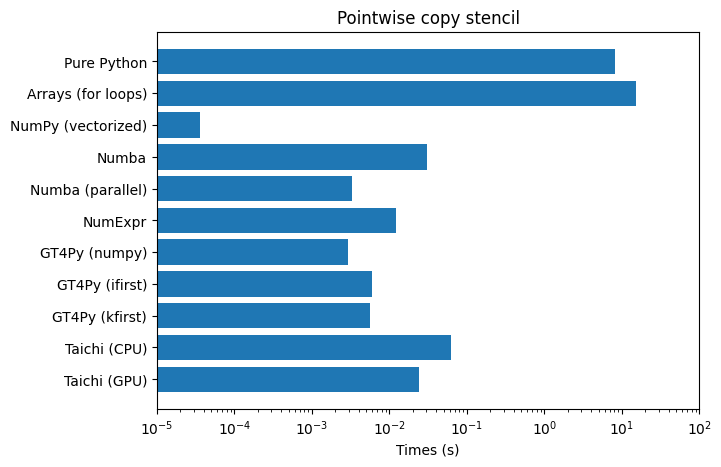

In [7]:
comparison_plot(test_names, times_avg, title="Pointwise copy stencil", save=True)

### Pointwise sine stencil

In [8]:
test_names = [
    "list_sin_pointwise", "array_sin_pointwise", "numpy_sin_pointwise", "numba_sin_pointwise",
    "numba_parallel_sin_pointwise", "numexpr_sin_pointwise", "gt4py_numpy_sin_pointwise",
    "gt4py_ifirst_sin_pointwise", "gt4py_kfirst_sin_pointwise", "taichi_field_parallel_cpu_sin_pointwise",
    "taichi_field_parallel_gpu_sin_pointwise"
]
times_avg = [read_results(test) for test in test_names]

# Nicer names for the plots
test_names = [
    "Pure Python", "Arrays (for loops)", "NumPy (vectorized)", "Numba",
    "Numba (parallel)", "NumExpr", "GT4Py (numpy)", "GT4Py (ifirst)",
    "GT4Py (kfirst)", "Taichi (CPU)", "Taichi (GPU)"
]

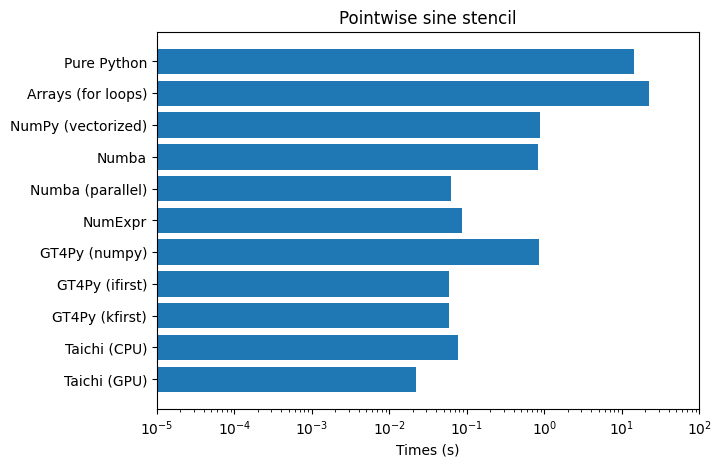

In [9]:
comparison_plot(test_names, times_avg, title="Pointwise sine stencil", save=True)

### 1D stencil

In [10]:
test_names = [
    "list_1D_same_col_ZYX", "numpy_1D_same_col", "numba_1D_same_col", "numexpr_1D_same_col",
    "gt4py_numpy_1D_same_col", "gt4py_ifirst_1D_same_col", "gt4py_kfirst_1D_same_col",
    "taichi_cpu_1D_same_col", "taichi_gpu_1D_same_col"
]
times_avg = [read_results(test) for test in test_names]

# Nicer names for the plots
test_names = [
    "Pure Python", "NumPy (vectorized)", "Numba (parallel)", "NumExpr", "GT4Py (numpy)",
    "GT4Py (ifirst)", "GT4Py (kfirst)", "Taichi (CPU)", "Taichi (GPU)"
]

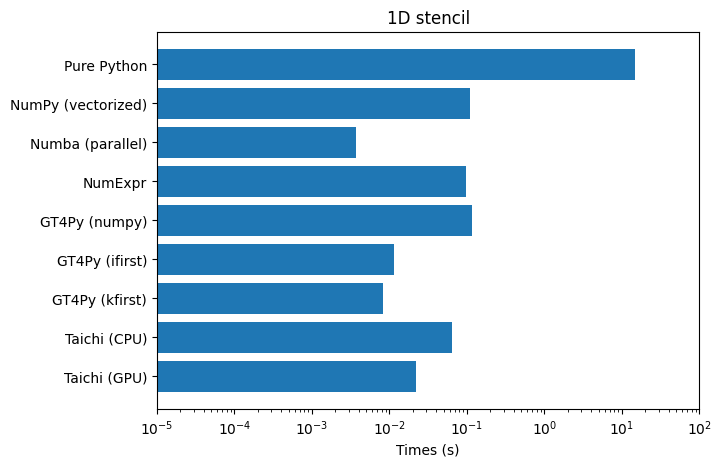

In [11]:
comparison_plot(test_names, times_avg, title="1D stencil", save=True)

### 2D stencil

In [12]:
test_names = [
    "numpy_2D", "numba_2D", "gt4py_numpy_2D", "gt4py_ifirst_2D",
    "gt4py_kfirst_2D", "taichi_cpu_2D", "taichi_gpu_2D"
]
times_avg = [read_results(test) for test in test_names]

# Nicer names for the plots
test_names = [
    "NumPy (vectorized)", "Numba (parallel)", "GT4Py (numpy)",
    "GT4Py (ifirst)", "GT4Py (kfirst)", "Taichi (CPU)", "Taichi (GPU)"
]

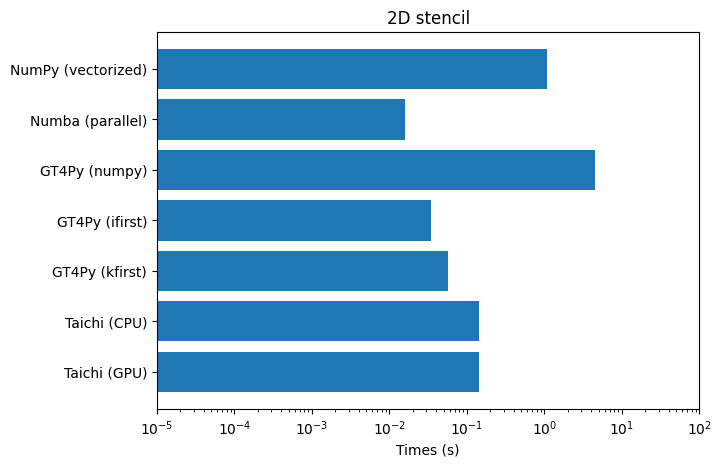

In [13]:
comparison_plot(test_names, times_avg, title="2D stencil", save=True)